# Содержание

1. [Приоритезация гипотез](#hyp)   
    1.1. [Обзор гипотез](#hyp_info)   
    1.2. [Расчет ICE](#hyp_ice)   
    1.3. [Расчет RICE](#hyp_rice)   
    1.4. [Вывод](#hyp_result)   
2. [Анализ А/В теста](#test)   
    2.1. [Подготовка данных](#test_pre)   
    [Вывод](#test_pre_result)  
    
    2.2. [Оценка куммулятивных данных](#test_cumm)   
    [Выручка](#test_cumm1)   
    [Средний чек](#test_cumm2)   
    [Конверсия](#test_cumm3)   
    [Вывод](#test_cumm_result)      
    
    2.3. [Анализ выбросов](#test_anomalis)   
    [Вывод](#test_anomalis_result)      
    
    2.4. [Статичтический анализ](#test_stat)   
    [Отличия конверсий по "сырым" данным](#test_stat1)   
    [Отличия средних чеков по "сырым" данным](#test_stat2)   
    [Отличия конверсий по "чистым" данным](#test_stat3)   
    [Отличия средних чеков по "чистым" данным](#test_stat4)   
    [Вывод](#test_stat_result)       
3. [Общий вывод](#result) 

# А/В тестирование в интернет-магазине

В настоящем прокте рассматривается крупный интернет магазин. Совместно с отделом маркетинга подготовлены 9 гипотез, направленных на увеличение выручки.

**Цель** - выбрать наиболее приоритетную гипотезу, провести по ней A/B тест и проанализировать результат.

## Приоретизация гипотез
<a id='hyp'></a>

Для проведения A/B теста необходимо выбрать гипотезу. Для этого ознакомимся со всеми девятью гипотезами, расчитаем приоритет для каждой из них двумя способами (ICE и RICE) и выберем самую приоритетную.

### Обзор гипотез
<a id='hyp_info'></a>

Для начала познакомимся с гипотезами.

In [1]:
import pandas as pd                                    # импорт библиотеки pandas
import numpy as np                                     # импорт библиотеки numpy
import datetime as dt                                  # импорт библиотеки datetime
from scipy import stats as st                          # импорт модуля stats из библиотеки scipy
import matplotlib.pyplot as plt                        # импорт модуля pyplot библиотеки matplotlib
import warnings

warnings.simplefilter("ignore")
%config InlineBackend.figure_formay = 'retina'
pd.set_option('display.max_columns', None)             # вывод всех столбцов таблицы
pd.set_option('display.max_rows', None)                # вывод всех строк
pd.set_option("max_colwidth", None)                    # вывод по ширине столбцов

In [2]:
# открываем исходный файл с гипотезами и сохраняем его в переменную hypothesis
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**В подготовленном списке 9 гипотез `Hypothesis`:**
1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.
2. Запустить собственную службу доставки, что сократит срок доставки заказов.
3. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.
4. Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.
5. Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.
6. Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов.
7. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.
8. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
9. Запустить акцию, дающую скидку на товар в день рождения.

Для каждой гипотезы указаны такие параметры, как:
- `Reach` - охват пользователей по 10-бальной шкале; 
- `Impact` - влияние на пользователей по 10-бальной шкале;
- `Confidence` - уверенность в гипотезе по 10-бальной шкале;
- `Efforts` - затраты ресурсов на проверку гипотезы по 10-бальной шкале.

Для каждой гипотезы выполним расчет приоритета двумя методами - ICE и RICE. Сравним их результаты и выберем одну самую приоритетную гипотезу.

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

### Расчет ICE
<a id='hyp_ice'></a>

In [3]:
# добавим в исходную таблицу значение приоритета ICE
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


По результатам расчета ICE самая приоритетная гипотеза №9:  
_Запустить акцию, дающую скидку на товар в день рождения._

### Расчет RICE
<a id='hyp_rice'></a>

In [4]:
# добавим в исходную таблицу значение приоритета RICE
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По результатам расчета RICE самая приоритетная гипотеза №8:  
_Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок._

### Вывод
<a id='hyp_result'></a>
1. При приоритезации гипотез по ICE и RICE получены разные результаты. Это связано с тем, что RICE содержит дополнительную переменную `Reach`. Выбор расчета связан с полнотой исходных данных - поэтому в данном случае ориентируемся на значения RICE.
2. Будем проводить A/B тест по гипотезе:  
_Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок._

## Анализ А/В теста
<a id='test'></a>

A/B тест проведен. Изучим полученные в его результате данные. А также проанализируем основные метрики: выручку, средний чек и конверсию.

### Подготовка данных
<a id='test_pre'></a>

In [5]:
# открываем исходные файлы с заказами и пользователями и сохраняем их в переменные orders и visitors
orders, visitors = (
    pd.read_csv('orders.csv'),
    pd.read_csv('visitors.csv')
)

In [6]:
# функция вывода информации о таблице и ее первых 5 строк
def info_view(data):
    return display(data.head()), data.info()

In [7]:
# вывод информации о visits, orders и costs
info_view(orders)
info_view(visitors)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


(None, None)

Данные о заказах `orders` содержат:
- `transactionId` - идентификатор заказа;
- `visitorId` - идентификатор пользователя, совершившего заказ;
- `date` - дата, когда был совершен заказ;
- `revenue`- выручка заказа;
- `group` - группа А/В теста.

Данные о заказах `visitors` содержат:
- `date` - дата;
- `group` - группа А/В теста;
- `visitors` - количество пользователей в указанную дату в указанной группе А/В теста.

Произведем следующие корректировки исходных данных:
1. Названия столбцов `transactionId` и `visitorId` выполним "змеиным стилем".
2. Преобразуем столбцы с датами в тип `datetime`.
3. Проверим данные на дубликаты.
4. Проверим количество посетителей по группам - должно быть примерно 50\50.
5. Проверим пересечение пользователей в обеих группах.

In [8]:
# заменим названия столбцов в orders
orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

#изменим тип данных в столбцах с датой и временем на тип datetime
orders['date'], visitors['date'] = (
    pd.to_datetime(orders['date']),
    pd.to_datetime(visitors['date']),
)

# вывод информации о visits, orders и costs
info_view(orders)
info_view(visitors)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


(None, None)

In [9]:
# проверим таблицы на дубликаты
(
    orders.duplicated().sum(),
    visitors.duplicated().sum()
)

(0, 0)

In [10]:
# проверим количество посетителей в каждой группе
print(
    'Всего участвуют - {} человек \n Группа А - {:.0%}\n Группа В - {:.0%}'
    .format(
        orders['visitor_id'].nunique(),
        orders.query('group == "A"')['visitor_id'].nunique()/orders['visitor_id'].nunique(),
        orders.query('group == "B"')['visitor_id'].nunique()/orders['visitor_id'].nunique()
    )
)

Всего участвуют - 1031 человек 
 Группа А - 49%
 Группа В - 57%


In [30]:
# проверим, пересекаются ли пользователи в группах
orders.query('group == "A"')['visitor_id'].isin(orders.query('group == "B"')['visitor_id']).sum()

89

Названия столбцов заменены, типы данных дат исправлены, дубликаты не обнаружены. В группах количество пользователей примерно поравну. При этом, пользователей, оказавшихся в обеих группах - 89. Это говорит о некачественном делении трафика при подготовке к тесту.

Теперь на основе данных `orders` и `visitors` создадим таблицу `data` для проведения дальнейшего анализа и проверки гипотезы. В неё войдут следующие данные:
- `date` — дата;
- `orders_A` — количество заказов в выбранную дату в группе A;
- `revenue_A` — суммарная выручка в выбранную дату в группе A;
- `orders_B` — количество заказов в выбранную дату в группе B;
- `revenue_B` — суммарная выручка в выбранную дату в группе B;
- `orders_cummulative_A` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenue_cummulative_A` — суммарная выручка до выбранной даты включительно в группе A;
- `orders_cummulative_B` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenue_cummulative_B` — суммарная выручка до выбранной даты включительно в группе B;
- `visitors_A` — количество пользователей в выбранную дату в группе A;
- `visitors_B` — количество пользователей в выбранную дату в группе B;
- `visitors_cummulative_A` — количество пользователей до выбранной даты включительно в группе A;
- `visitors_cummulative_B` — количество пользователей до выбранной даты включительно в группе B.

Создадим промежуточные таблицы для группы А

In [12]:
# создадим таблицу с количеством пользователей по дате группы А
visitors_A = visitors.query('group == "A"')[['date', 'visitors']]
visitors_A.columns = ['date', 'visitors_A']

# создадим таблицу с кумулятивным количеством пользователей по дате группы А
visitors_cummulative_A = visitors_A.apply(
    lambda x: visitors_A[visitors_A['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_A': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_A.columns = ['date', 'visitors_cummulative_A']

# создадим таблицу с количеством заказов по дате группы А
orders_A = (
    orders.query('group == "A"')[['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_A.columns = ['date', 'orders_A', 'revenue_A']

# создадим таблицу с кумулятивным количеством заказов по дате группы А
orders_cummulative_A = orders_A.apply(
    lambda x: orders_A[orders_A['date'] <= x['date']].agg(
        {'date': 'max', 'orders_A': 'sum', 'revenue_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_A.columns = ['date', 'orders_cummulative_A','revenue_cummulative_A']


Теперь создадим промежуточные таблицы для группы В.

In [13]:
# создадим таблицу с количеством пользователей по дате группы B
visitors_B = visitors.query('group == "B"')[['date', 'visitors']]
visitors_B.columns = ['date', 'visitors_B']

# создадим таблицу с кумулятивным количеством пользователей по дате группы B
visitors_cummulative_B = visitors_B.apply(
    lambda x: visitors_B[visitors_B['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_B': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_B.columns = ['date', 'visitors_cummulative_B']

# создадим таблицу с количеством заказов по дате группы B
orders_B = (
    orders.query('group == "B"')[['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_B.columns = ['date', 'orders_B', 'revenue_B']

# создадим таблицу с кумулятивным количеством заказов по дате группы B
orders_cummulative_B = orders_B.apply(
    lambda x: orders_B[orders_B['date'] <= x['date']].agg(
        {'date': 'max', 'orders_B': 'sum', 'revenue_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_B.columns = ['date', 'orders_cummulative_B','revenue_cummulative_B']


Далее объединим все промежуточные таблицы в одну `data`.

In [14]:
data = (
    orders_A.merge(
        orders_B, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_A, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_B, left_on='date', right_on='date', how='left')
    .merge(visitors_A, left_on='date', right_on='date', how='left')
    .merge(visitors_B, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_A, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_B, left_on='date', right_on='date', how='left')
)
info_view(data)

,date,orders_A,revenue_A,orders_B,revenue_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_A,visitors_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    31 non-null     datetime64[ns]
 1   orders_A                31 non-null     int64         
 2   revenue_A               31 non-null     int64         
 3   orders_B                31 non-null     int64         
 4   revenue_B               31 non-null     int64         
 5   orders_cummulative_A    31 non-null     int64         
 6   revenue_cummulative_A   31 non-null     int64         
 7   orders_cummulative_B    31 non-null     int64         
 8   revenue_cummulative_B   31 non-null     int64         
 9   visitors_A              31 non-null     int64         
 10  visitors_B              31 non-null     int64         
 11  visitors_cummulative_A  31 non-null     int64         
 12  visitors_cummulative_B  31 non-null     int64       

(None, None)

#### Вывод
<a id='test_pre_result'></a>
1. Таблица с данными для дальнейшего анализа подготвлена.
2. Данные в таблице за период с 01 по 31 августа 2019 года.

### Оценка куммулятивных данных
<a id='test_cumm'></a>

Для оценки различных метрик построим несколько графиков:
- График кумулятивной выручки по группам;
- График кумулятивного среднего чека по группам;
- График относительного изменения кумулятивного среднего чека группы В к группе А;
- График кумулятивной коверсии по группам;
- График относительного изменения кумулятивной конверсии группы В к группе А.

#### Выручка
<a id='test_cumm1'></a>

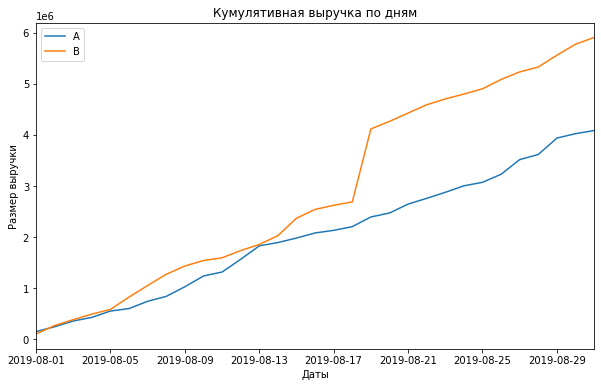

In [15]:
# строим график кумулятивной выручки по группам
fig=plt.figure(figsize=(10,6))
plt.plot(data['date'], data['revenue_cummulative_A'], label='A') # Строим график выручки группы А
plt.plot(data['date'], data['revenue_cummulative_B'], label='B') # Строим график выручки группы B
plt.legend() 
plt.title('Кумулятивная выручка по дням')
plt.xlabel('Даты')
plt.ylabel('Размер выручки')
plt.xlim(dt.datetime(2019,8,1),dt.datetime(2019,8,31))
plt.show()

**Вывод:**

Выручка группы В растет стабильно лучше, чем у группы А. При этом с 18 августа наблюдается резкий рост по отношению к группе А.

#### Средний чек
<a id='test_cumm2'></a>

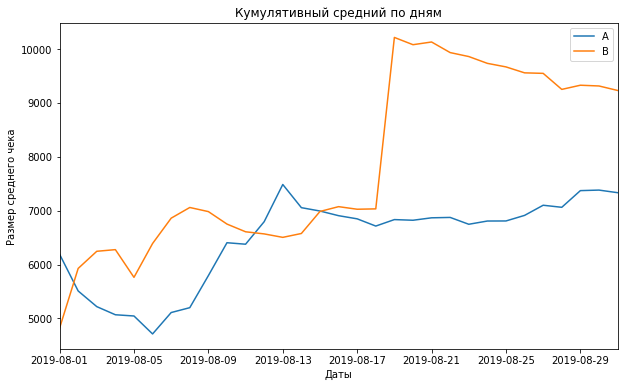

In [16]:
# строим график кумулятивного среднего чека по группам
fig=plt.figure(figsize=(10,6))
plt.plot(data['date'], data['revenue_cummulative_A']/data['orders_cummulative_A'], label='A')
plt.plot(data['date'], data['revenue_cummulative_B']/data['orders_cummulative_B'], label='B')
plt.legend() 
plt.title('Кумулятивный средний по дням')
plt.xlabel('Даты')
plt.ylabel('Размер среднего чека')
plt.xlim(dt.datetime(2019,8,1),dt.datetime(2019,8,31))
plt.show()

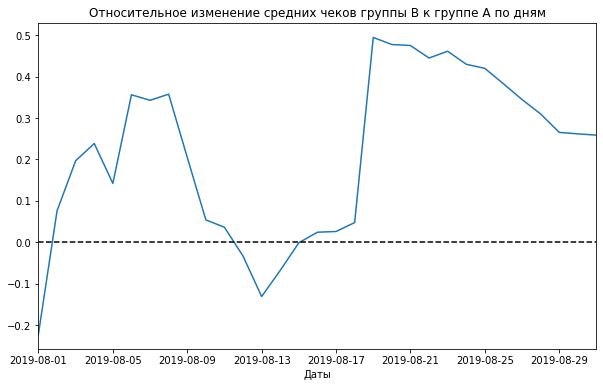

In [17]:
# строим график относительного изменения кумулятивного среднего чека группы В к группе А
fig=plt.figure(figsize=(10,6))
plt.plot(
    data['date'],
    (data['revenue_cummulative_B']/data['orders_cummulative_B'])/(data['revenue_cummulative_A']/data['orders_cummulative_A'])-1
)
plt.axhline(y=0, color='black', linestyle='--') # добавляем ось X
plt.title('Относительное изменение средних чеков группы В к группе А по дням')
plt.xlabel('Даты')
plt.xlim(dt.datetime(2019,8,1),dt.datetime(2019,8,31))
plt.show()

**Вывод:**

Средний чек группы В также выше, чем у группы А, вплоть до 50%. Несмотря на то, что он падал ниже группы А до 20% с 1 по 2 августа и с 11 по 15 августа.


#### Конверсия
<a id='test_cumm3'></a>

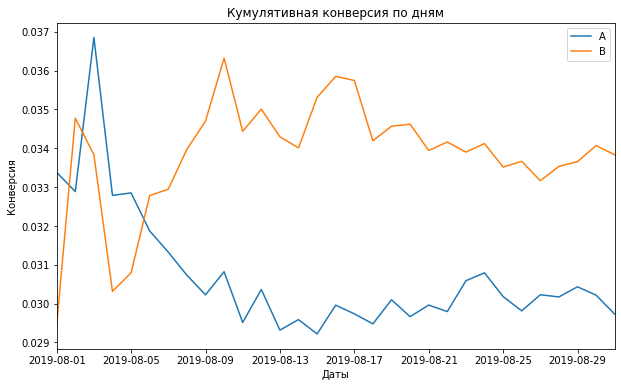

In [18]:
# строим график кумулятивной коверсии по группам
fig=plt.figure(figsize=(10,6))
plt.plot(data['date'], data['orders_cummulative_A']/data['visitors_cummulative_A'], label='A')
plt.plot(data['date'], data['orders_cummulative_B']/data['visitors_cummulative_B'], label='B')
plt.legend() 
plt.title('Кумулятивная конверсия по дням')
plt.xlabel('Даты')
plt.ylabel('Конверсия')
plt.xlim(dt.datetime(2019,8,1),dt.datetime(2019,8,31))
plt.show()

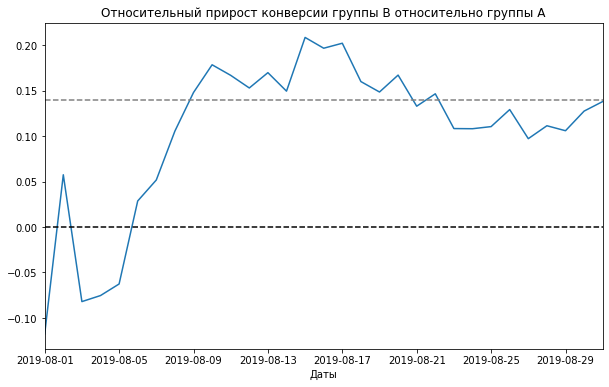

In [19]:
# строим график относительного изменения кумулятивной конверсии группы В к группе А
fig=plt.figure(figsize=(10,6))
plt.plot(
    data['date'], 
    (data['orders_cummulative_B']/data['visitors_cummulative_B'])/(data['orders_cummulative_A']/data['visitors_cummulative_A'])-1
        )
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Даты')
plt.xlim(dt.datetime(2019,8,1),dt.datetime(2019,8,31))
plt.show()

**Вывод:**

В начале месяца (примерно с 1 по 6 августа) конверсия группы В сильно колеблиться по отношению к группе А. Но далее конверсия стабильно выше и к концу периода устанавливается на отметке 14%.

#### Вывод
<a id='test_cumm_result'></a>

По результатам анализа куммулятивных данных можно сказать, что в целом наблюдается положительная динамика метрик группы В по отношению к группе А. И если в начале августа наблюдабтя колебания этих метрик, то со второй половины месяца их рост стабилен.   
К концу августа мы наблюдаем следующие изменения значений метрик для группы А и В:
- выручка 4.1 млн -> 6.0 млн

- средний 7300 -> 9200

- конверсия 0.030 -> 0.034

### Анализ выбросов
<a id='test_anomalis'></a>

С помощью диаграмм оценим выбросы:
- количества заказов по пользователям;
- стоимостей заказов.

Также посчитаем 95-й и 99-й перцентили и выберем границу для определения аномальных заказов.

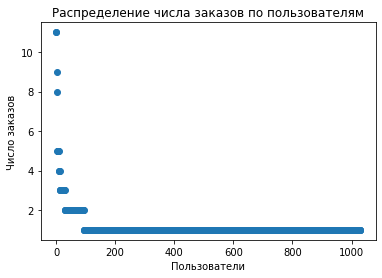

[2. 4.]


In [20]:
# таблица числа заказов по пользователям
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id':'nunique'})
    .sort_values(by='transaction_id', ascending=False)
)
orders_by_users.columns=['visitor_id','orders']

# строим диаграмму числа заказов по пользователям
x_values = pd.Series(range(0,len(orders_by_users['orders'])))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Распределение числа заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Число заказов')
plt.show()

# подсчет перцентилий по числу заказов
print(np.percentile(orders_by_users['orders'], [95, 99]))

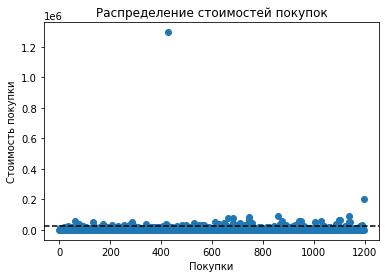

[28000.  58233.2]


In [21]:
# строим диаграмму стоимости покупок
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.axhline(y=28000, color='black', linestyle='--')
plt.title('Распределение стоимостей покупок')
plt.xlabel('Покупки')
plt.ylabel('Стоимость покупки')
plt.show()

# подсчет перцентилий стоимости покупок
print(np.percentile(orders['revenue'], [95, 99]))

#### Вывод
<a id='test_anomalis_result'></a>

1. Наибольшее число заказов среди пользователей - один. Две покупки встречаются редко, более - скорее аномалии. Возможно, срок в месяц - слишком мал для повторных покупок. Возможно, нужно работать над удержанием пользователей и повышением их _LTV_.
2. Стоимость заказов в основном не превышает 28000. При этом заказов до 58000 тоже достаточно много - они не кажутся аномалиями.
3. В качестве верхней границы примем число заказов, равное 2. А границу стоимости заказов примет 58000.

### Статистический анализ
<a id='test_stat'></a>

Выполним расчет статистической значимости различий в конверсии и среднем чеке между группами.  
Расчет выполним по исходным данным, а также по данным без выбросов.

Сформулируем нулевую и альтернативную гипотезу для обеих метрик.

**Для конверсии:**

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Конверсии в группах А и В не отличаются}\\
   H_1 :\text{Конверсии в группах А и В разные}
 \end{cases}
\end{equation*}$

**Для среднего чека:**

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средний чек в группах А и В не отличается}\\
   H_1 :\text{Средний чек в группах А и В разный}
 \end{cases}
\end{equation*}$

#### Отличия конверсий по "сырым" данным
<a id='test_stat1'></a>

Посчитаем статистическую значимость различия в конверсии между группами.
В качестве критического уровня статистической значимости примем $\alpha = 0.05$.  
Т.к. "сырые" данные содержат выбросы, применим тест Манна_Уитни.  

Для это подготовим две выборки:
- `sample_A` (для группы А);
- `sample_B` (для группы B).

In [22]:
# таблица числа заказов по пользователям для группы А
orders_by_users_A = (
    orders.query('group == "A"')
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':'nunique'})
)
orders_by_users_A.columns=['visitor_id','orders']

# выборка количества заказов для группы А
sample_A = pd.concat(
    [
        orders_by_users_A['orders'],
        pd.Series(
            0, 
            index=np.arange(data['visitors_A'].sum() - len(orders_by_users_A['orders'])), 
            name='orders'
        )
    ]
    ,axis=0
)

# таблица числа заказов по пользователям для группы B
orders_by_users_B = (
    orders.query('group == "B"')
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':'nunique'})
)
orders_by_users_B.columns=['visitor_id','orders']

# выборка количества заказов для группы B
sample_B = pd.concat(
    [
        orders_by_users_B['orders'],
        pd.Series(
            0, 
            index=np.arange(data['visitors_B'].sum() - len(orders_by_users_B['orders'])), 
            name='orders'
        )
    ]
    ,axis=0
)

print("p-value = {0:.3f}".format(st.mannwhitneyu(sample_A, sample_B)[1]))

print(
    "Относительный прирост группы В по отношению к группе А составляет {0:.1%}"
    .format(sample_B.mean() / sample_A.mean() - 1)
)

p-value = 0.017
Относительный прирост группы В по отношению к группе А составляет 13.8%


**Вывод:**

На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу. Различия в конверсии между выборками А и В есть. Конверсия группы В выше конверсии группы А на 13.8%


#### Отличия средних чеков по "сырым" данным
<a id='test_stat2'></a>

Посчитаем статистическую значимость различия в среднем чеке между группами.
В качестве критического уровня статистической значимости примем $\alpha = 0.05$.  
Т.к. "сырые" данные содержат выбросы, применим тест Манна_Уитни.  

In [23]:
print(
    'p-value = {0:.3f}'
    .format(
        st.mannwhitneyu(
            orders.query('group == "A"')['revenue'], 
            orders.query('group == "B"')['revenue']
        )
        [1])
)
print(
    'Относительный прирост группы В по отношению к группе А составляет {0:.1%}'
    .format(
        orders.query('group == "A"')['revenue'].mean()/orders.query('group == "B"')['revenue'].mean()-1
    )
) 

p-value = 0.729
Относительный прирост группы В по отношению к группе А составляет -20.6%


**Вывод:**

На имеющихся данных, на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу. Различий в среднем чеке между выборками А и В нет. При этом средний чек группы В ниже среднего чека группы А на 20.6%


#### Отличия конверсий по "чистым" данным
<a id='test_stat3'></a>

Посчитаем статистическую значимость различия в конверсии между группами.
В качестве критического уровня статистической значимости примем $\alpha = 0.05$.  
Для "чистых" данных, в рамках эксперимента, также применим тест Манна_Уитни.  

Для это подготовим две выборки:
- `sample_A_filtered` (для группы А);
- `sample_B_filtered` (для группы B).

In [24]:
# Узнаем, сколько всего аномальных пользователей 
users_too_many_orders = pd.concat(
    [
        orders_by_users_A.query('orders > 2')['visitor_id'],
        orders_by_users_B.query('orders > 2')['visitor_id'],
    ],
    axis=0,
)
users_too_expensive_orders = orders[orders['revenue'] > 58000]['visitor_id']
abnormal_users = (
    pd.concat([users_too_many_orders, users_too_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormal_users.shape 

(31,)

In [25]:
# выборка количества заказов для группы А
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# выборка количества заказов для группы B
sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print("p-value = {0:.3f}".format(st.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))

print(
    "Относительный прирост группы В по отношению к группе А составляет {0:.1%}"
    .format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1)
)

p-value = 0.010
Относительный прирост группы В по отношению к группе А составляет 17.4%


**Вывод:**

На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу. Различия в конверсии между выборками А и В есть. Конверсия группы В выше конверсии группы А на 17.4%

#### Отличия средних чеков по "чистым" данным
<a id='test_stat4'></a>

Посчитаем статистическую значимость различия в среднем чеке между группами.
В качестве критического уровня статистической значимости примем $\alpha = 0.05$.  
Для "чистых" данных, в рамках эксперимента, также применим тест Манна_Уитни. 

In [26]:
print(
    'p-value = {0:.3f}'
    .format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)))
                    ]['revenue'], 
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)))
                    ]['revenue']
        )
        [1])
)
                
print(
    'Относительный прирост группы В по отношению к группе А составляет {0:.1%}'
    .format(
        orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)))
                    ]['revenue'].mean()
                    /orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)))
                    ]['revenue'].mean()-1
    )
) 

p-value = 0.798
Относительный прирост группы В по отношению к группе А составляет 2.0%


**Вывод:**

На имеющихся данных, на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу. Различий в среднем чеке между выборками А и В нет. При этом средний чек группы В выше среднего чека группы А на 2%


#### Вывод
<a id='test_stat_result'></a>

Статистический анализ был проведен для исходных ("сырых") данных и данных, очищенных от выбросов.  
По результатам анализа в обоих случаях вывод был одинаковым:

1. **Различия в конверсии** между выборками А и В **есть**, на уровне значимости 5%.
2. **Различий в среднем чеке** между выборками А и В **нет**, на уровне значимости 5%.

При этом разница в самих значениях метрик между группами А и В отличалась существенно:

- прирост конверсии по "сырым" данным составил 13.8%, по "чистым" - 17.4%;
- средний чек выше по "сырым" данным на 20.6%, по "чистым" - всего на 2%.

Необходимость анализа выбросов может не повлиять на оценку самой гипотезы. Однако, дает большее представление об истинном характере данных и позволяет строить более жизнеспособные предположения.

## Общий вывод
<a id='result'></a>

В настоящем проекте были рассмотрены данные, собранные за месяц в ходе проведения A/B теста _"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"_.

Результаты анализа данных показали, что:
- средний чек в группе В остался таким же как в группе А;
- конверсия в группе В выросла по отношению к группе А не менее, чем на 14% с 0.030 до 0.034;
- соответственно, выросла и общая выручка с 4.1 млн в группе А до 6.0 млн в группе В.

Кроме того, колебания данных, наблюдаемые в начале месяца сменились на стабильный рост метрик группы В по отношению к группе А.

**Решение:** Остановить тест. Успех группы В по отношению к группе А.